# Bayes Classifier<hr>

- For each class y, we model \\(p(x | y)\\), rather than directly modeling \\(p(y | x)\\)
- "Generative model" is very appropriate in this case, as we'll be using it to generate sample
- Multiple ways to learn \\(p(x | y)\\)
- Easy way: \\(p(x | y) = N(u_y, \sum_y)\\)

1) find all training data x that belongs to class y

2) \\(u_y \\) = mean of those x's, \\(\sum_y\\) = convariance of those x's

- Classification decision rule: \\(argmax_y p(y | x) = argmax_y[p(x | y)p(y)/p(x)]\\)

<br><br>
## Sampling from our Bayes classifier<hr>
### 1st method
- First way: Pick a class - suppose we choose y = 1
- We know \\(p(x | y)\\) is a Gaussian (we've defined it that way)
- Sample from this Gausiaan (can use Scipy)
 - mvn.rvs(mean = mean_for_y_1, cov = cov_for_y_1)

<br> 
### 2nd method
the second way to sample is just that easy mechanically but it's conceptually a little diffrent.

- Second way:
- We have a graphical model
- Each node represents a distribution
- \\(p(y), p(x | y)\\)
- Key: y has its own distribution
- Fitting: \\(p(y == k)\\) = # images of digit k / # total images (note: I just assumed uniform dist. in the code)
- Key: since we have a \\(p(y)\\), we can sample from it

<br>
### Conclusion
- 1st method: sample from a given digit / class
 - sample_given_y(y)
 
- 2nd method: sample from \\(p(y)p(x | y) = p(x,y)\\)
 - Sample from \\(p(y)\\) first
 - Now we have y, so sample from \\(p(x | y)\\)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot = False)

In [69]:
class BayesClassifer:
    def fit(self, X, Y):
        
        # get k number of classes
        self.K = len(set(Y))
        
        self.gaussians = []
        for k in range(self.K):
            Xk = X[Y == k]
            mean = Xk.mean(axis = 0)
            cov = np.cov(Xk.T)
            g = {'m': mean, 'c': cov}
            self. gaussians.append(g)
    
    def sample_given_y(self, y):
        g = self.gaussians[y]
        return mvn.rvs(mean = g['m'], cov = g['c'])
    
    def sample(self):
        y = np.random.randint(self.K)
        return self.sample_given_y(y)

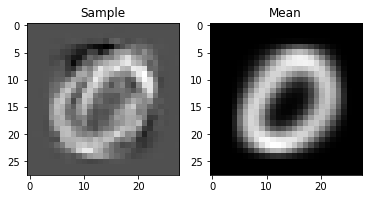

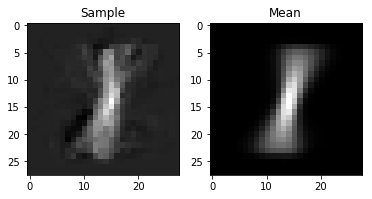

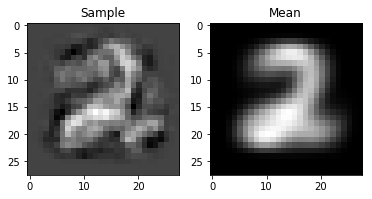

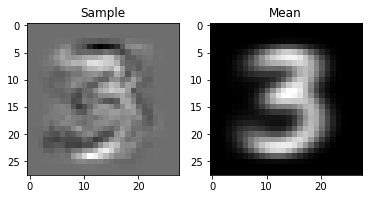

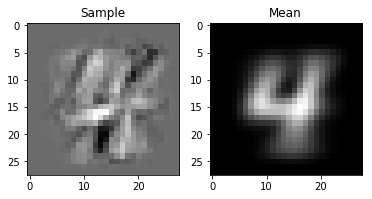

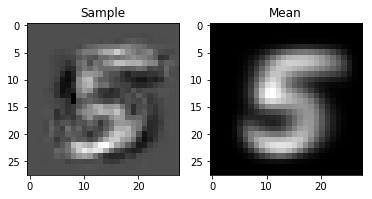

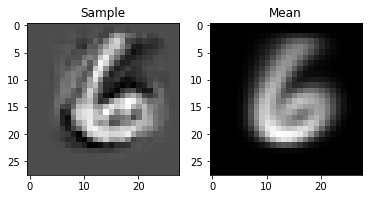

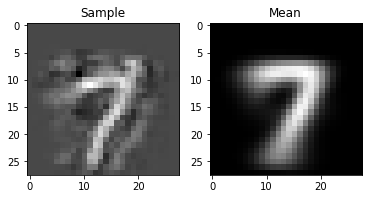

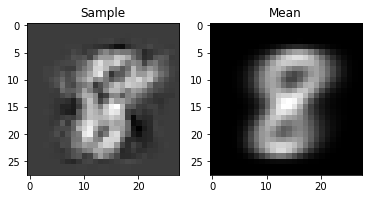

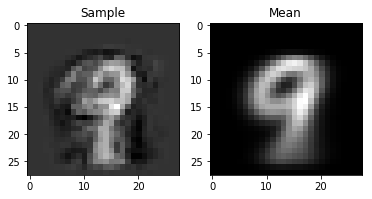

In [183]:
X = mnist.train.images
Y = mnist.train.labels

clf = BayesClassifer()
clf.fit(X,Y)

for k in range(clf.K):
    # show one sample for each class
    # also show the mean image learned
    
    sample = clf.sample_given_y(k).reshape(28, 28)
    mean = clf.gaussians[k]['m'].reshape(28, 28)
    
    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title('Sample')
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title('Mean')
    plt.show()